### **Import Necessary Libraries**

In [1]:
import pandas as pd 
import numpy as np 
from IPython import display
import warnings
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### **Ignore Unwanted Warnings**

In [2]:
warnings.filterwarnings("ignore")

### **Reading The CSV Data**

In [3]:
data=pd.read_csv("signal-data.csv")

In [4]:
data.shape

(1567, 592)

In [5]:
data.head(5)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


### **Visualizing the Data**

The Data has around 590 numerical columns.

Thus the user input gained for simplify the visualization process

For the example purpose the user input for univariate analysis is 10

For bivariate analysis is 3 and 5

In [6]:
# Prompt user to input column names separated by commas
user_input = input("Enter column name for univariate analysis: ")

# Split the input into a list and strip any extra spaces
user_columns = [col.strip() for col in user_input.split(',')]

# Filter the selected columns to ensure they are in the dataset
selected_columns = [col for col in user_columns if col in data.columns]

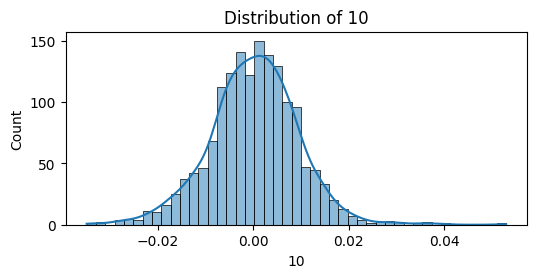

In [7]:
### Univariate Analysis
# Histograms for selected features
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### **Analysis of the Plot**

### **Observations:**

**Bell-Shaped Curve:** The distribution appears to follow a bell-shaped curve, which is characteristic of a normal distribution (also known as a Gaussian distribution).

**Symmetry:** The distribution is symmetrical around the center, indicating an equal likelihood of values occurring above or below the center.

**Central Tendency:** The peak of the distribution, representing the most frequent value, appears to be around 0. This suggests that the average (mean) of the data is close to 0.

**Spread:** The width of the bell curve indicates the spread of the data. A wider curve suggests more variability, while a narrower curve indicates less variability. In this case, the spread seems moderate.

### **Inferences:**

Based on these observations, we can infer that

The data is normally distributed. This means that the majority of the values cluster around the mean, with fewer values occurring in the tails.

The mean of the data is approximately 0. This is the central value around which the distribution is centered.

The standard deviation of the data is moderate. This indicates that the data points are moderately spread out around the mean.

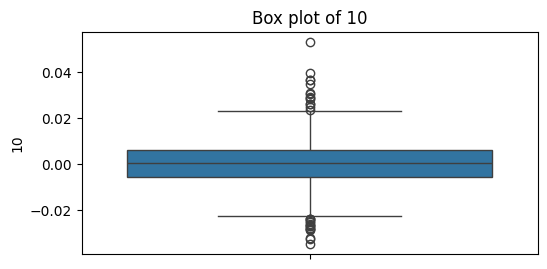

In [8]:
# Box plots for selected features
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

### **Analysis of the Plot**

### **Observations:**

**Median:** The central line within the box represents the median, which is the 50th percentile of the data. It appears to be around 0.

**Interquartile Range (IQR):** The box itself represents the IQR, which is the range between the 25th and 75th percentiles. The IQR seems relatively small, indicating that the middle 50% of the data is tightly clustered.

**Whiskers:** The lines extending from the box are the whiskers. They indicate the range of the data excluding any outliers. The upper whisker extends to a value slightly above 0.02, while the lower whisker extends to a value slightly below -0.02.

**Outliers:** The individual points plotted outside the whiskers are potential outliers. In this case, there are a few outliers on the upper side of the distribution.

### **Inferences:**

Based on these observations, we can infer that

The median of the data is close to 0. This means that half of the data points are above 0 and half are below 0.

The data is relatively concentrated around the median. The small IQR suggests that most of the data points are within a narrow range.

There are some outliers present. The outliers on the upper side indicate that there are a few data points that are significantly larger than the majority of the data.

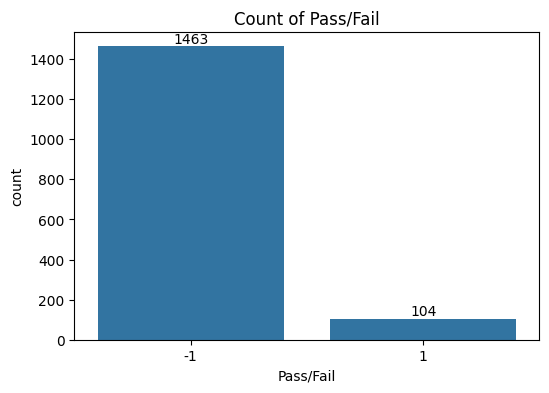

In [9]:
count_values = data['Pass/Fail'].value_counts()

# Plotting the count plot for the 'Pass/Fail' categorical feature
plt.figure(figsize=(6, 4))
sns.countplot(x='Pass/Fail', data=data)

# Annotating each bar with the respective count values
for index, value in enumerate(count_values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Count of Pass/Fail')
plt.show()

### **Analysis of the Plot**

### **Observations:**

**Dominant Category:** The bar representing the "-1" category, presumably indicating "Pass," is significantly taller than the bar representing the "1" category, indicating "Fail." This suggests that a large majority of individuals passed.

**Frequency:** The specific count of individuals in each category is provided: 1463 passed, while only 104 failed.

**Skewness:** The distribution is heavily skewed towards the "Pass" category, indicating a high degree of success.

### **Inferences:**

Based on these observations, we can infer that

Most individuals passed. The overwhelming majority of individuals in the dataset were successful.

The failure rate is low. Only a small percentage of individuals failed.

The distribution is highly skewed. The data is heavily concentrated in the "Pass" category, with few individuals in the "Fail" category.

In [10]:
# Prompt user to input column names for bivariate analysis
user_input = input("Enter column names for bivariate analysis separated by commas: ")

# Split the input into a list and strip any extra spaces
user_columns = [col.strip() for col in user_input.split(',')]

# Filter the selected columns to ensure they are in the dataset
selected_columns = [col for col in user_columns if col in data.columns]

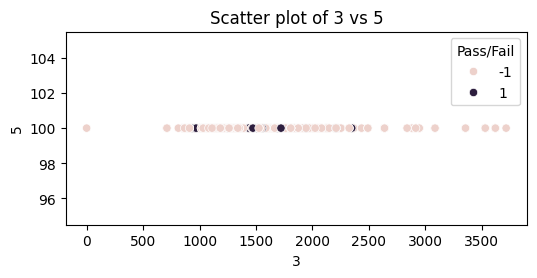

In [11]:
### Bivariate Analysis
# Scatter plots for pairwise features
plt.figure(figsize=(15, 10))
num_pairs = len(selected_columns) - 1
for i in range(num_pairs):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x=data[selected_columns[i]], y=data[selected_columns[i + 1]], hue=data['Pass/Fail'])  # Adjust hue as necessary
    plt.title(f'Scatter plot of {selected_columns[i]} vs {selected_columns[i + 1]}')
plt.tight_layout()
plt.show()

### **Analysis of the Plot**

### **Observations:**

**Clustering:** The data points are clustered in a narrow horizontal band around the y-value of 100.

**Limited Variation:** There is minimal variation in the y-values, suggesting that the variable represented by "5" has a relatively constant value.

**Separation by Category:** The data points are colored based on the "Pass/Fail" category. While the overall clustering is apparent, there might be a slight separation between the two categories along the x-axis.

### **Inferences:**

Based on these observations, we can infer that

There is a strong relationship between the variables "3" and "5." The data points are tightly clustered, indicating that changes in "3" are closely associated with changes in "5."

The variable "5" has a limited range of values. The data points are concentrated around the y-value of 100, suggesting that "5" primarily takes values close to this value.

The "Pass/Fail" category might be slightly correlated with the variable "3." If the separation between the two categories along the x-axis is significant, it could indicate that the values of "3" differ between those who passed and those who failed. However, further analysis would be needed to confirm this correlation.

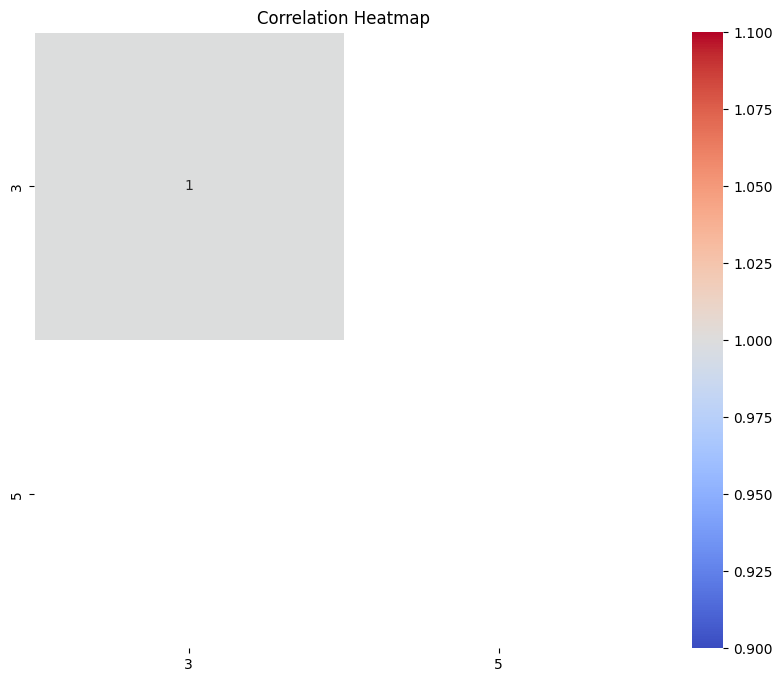

In [12]:
# Correlation heatmap for selected columns
plt.figure(figsize=(10, 8))
correlation_matrix = data[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### **Analysis of the Plot**

### **Observations:**

**Single Variable:** The heatmap only shows the correlation between a single variable (likely "3") with itself.

**Perfect Correlation:** The diagonal cell, representing the correlation of "3" with itself, is colored red, indicating a perfect positive correlation of 1. This is expected, as a variable is always perfectly correlated with itself.

**No Other Variables:** There are no other variables present in the heatmap, so we cannot analyze the correlation between "3" and any other variables.

### **Inferences:**

Based on these observations, we can infer that

The heatmap is incomplete. It only shows the correlation of one variable with itself, providing limited information.

There is no information about the correlation between "3" and other variables. To understand the relationships between "3" and other variables, we would need to include them in the heatmap.

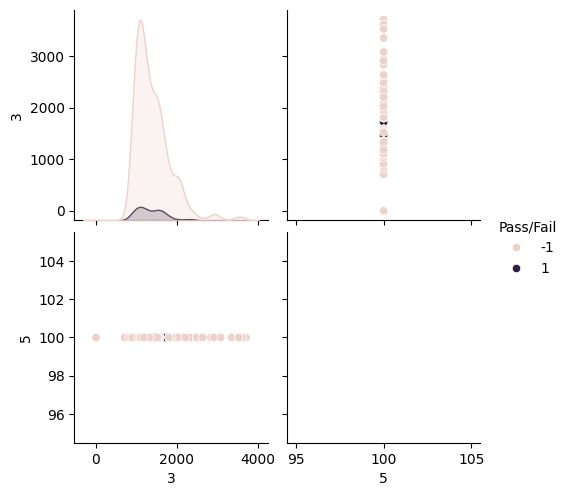

In [13]:
# Pair plot for selected columns
sns.pairplot(data[selected_columns + ['Pass/Fail']], hue='Pass/Fail')
plt.show()

### **Analysis of the Plot**

### **Observations:**

**Distribution of 3:** The histogram on the left shows the distribution of the variable "3." It appears to be right-skewed, with a long tail extending to the right. The majority of the values are clustered around 0, with fewer values occurring at higher levels.

**Scatter Plot:** The scatter plot in the upper right quadrant shows the relationship between "3" and "5." The data points are tightly clustered in a vertical band, indicating a strong positive correlation between the two variables.

**Distribution of 5:** The histogram on the bottom right shows the distribution of the variable "5." It is highly concentrated around the value of 100, with very little variation.

**Categorization:** The data points in the scatter plot are colored based on the "Pass/Fail" category. There seems to be a slight separation between the two categories along the x-axis (variable "3"), with the "Fail" category having higher values of "3."


### **Inferences:**

Based on these observations, we can infer that:

Variable 3 has a right-skewed distribution. Most values are concentrated around 0, with a few larger values.

There is a strong positive correlation between variables 3 and 5. Changes in one variable are closely associated with changes in the other.
Variable 5 has a highly concentrated distribution. Most values are very close to 100.

The "Pass/Fail" category might be slightly correlated with variable 3. Higher values of "3" might be associated with a higher likelihood of "Fail." However, further analysis would be needed to confirm this relationship.

### **Handling Null Values**

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [15]:
pd.set_option('display.max_rows', None)

null_values = data.isnull().sum()

null_columns = null_values[null_values > 0]

null_columns

0         6
1         7
2        14
3        14
4        14
5        14
6        14
7         9
8         2
9         2
10        2
11        2
12        2
13        3
14        3
15        3
16        3
17        3
18        3
19       10
21        2
22        2
23        2
24        2
25        2
26        2
27        2
28        2
29        2
30        2
31        2
32        1
33        1
34        1
35        1
36        1
37        1
38        1
39        1
40       24
41       24
42        1
43        1
44        1
45        1
46        1
47        1
48        1
49        1
50        1
51        1
52        1
53        4
54        4
55        4
56        4
57        4
58        4
59        7
60        6
61        6
62        6
63        7
64        7
65        7
66        6
67        6
68        6
69        6
70        6
71        6
72      794
73      794
74        6
75       24
76       24
77       24
78       24
79       24
80       24
81       24
82       24
83        1
84  

In [16]:
float_columns = data.select_dtypes(include=['float64']).columns

In [17]:
for i in float_columns:
    data[i].fillna(data[i].median(), inplace=True)

In [18]:
null_values = data.isnull().sum()

null_values.head()

Time    0
0       0
1       0
2       0
3       0
dtype: int64

### **Feature Extraction**

In [19]:
x=data.drop(columns=["Time","Pass/Fail"])

In [20]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0047,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0047,72.2889,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [21]:
y=data[["Pass/Fail"]]

In [22]:
y.head()

,Pass/Fail
0,-1
1,-1
2,1
3,-1
4,-1


### **Transformation of Data**

In [23]:
sd=StandardScaler()
x_scaled=sd.fit_transform(x)

### **Performing Train Test Split of Data**

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

### **Model Fitting and Prediction**

In [25]:
svm=SVC(kernel='linear',C=1.0,random_state=42)
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [26]:
y_pred=svm.predict(x_test)

### **Finding Accuracy Score**

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.84


### **Prediction Using Random Forest Model**

In [28]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred = rf.predict(x_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


### **Prediction Using Naive Bayes Model**

In [31]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [32]:
y_pred = nb.predict(x_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.21


### **Prediction Using Stacking Classifier Model**

In [34]:
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

In [35]:
stacking_clf.fit(x_train,y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('svm', SVC(probability=True, random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [36]:
y_pred=stacking_clf.predict(x_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


### **Improving Model Performance using Hyperparameter Tuning (Support Vector Machine)**
The Hyper Parameter tuning is Performed because the model performance on normal training is low 

Thus to improve the model performance the hyper parameter tuning is performed to increase the model prediction accuracy

For this model we use GridSearchCV module for performing the Hyper Parameter Tuning

In [38]:
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']    # Kernel coefficient
}

In [39]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [40]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [41]:
print("Best Parameters:{0}".format(best_params))
print("Best Score:{0}".format(best_score))

Best Parameters:{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score:0.9361529880478088


In [42]:
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

SVC(C=0.1, random_state=42)

In [43]:
y_pred=best_model.predict(x_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


### **Improving Model Performance using Hyperparameter Tuning (Random Forest)**

In [45]:
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider when looking for the best split
}

In [46]:
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [47]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [48]:
print("Best Parameters:{0}".format(best_params))
print("Best Score:{0}".format(best_score))

Best Parameters:{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score:0.9361529880478088


In [49]:
y_pred=best_model.predict(x_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


### **Improving Model Performance using Hyperparameter Tuning (Naive Bayes)**

In [51]:
param_grid_gaussian = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}

In [52]:
grid_search = GridSearchCV(nb, param_grid_gaussian, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1]})

In [53]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [54]:
print("Best Parameters:{0}".format(best_params))
print("Best Score:{0}".format(best_score))

Best Parameters:{'var_smoothing': 1}
Best Score:0.7503649402390438


In [55]:
y_pred=best_model.predict(x_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


### **Final Summary on The Predictive Analysis**

From the above predictive analysis, I have used the various classification algorithms like SVM, Random Forest, Naive Bayes.

A Special Ensemble Learning Algorithm known as Stacking Classifier is used for model prediction

The Stacking Classifier contains SVM,Gradient Boosting Classifier Decision Tree Classifier and Random Forest as base models and Logistic Regression as the final estimator model

Upon training the models it is found that Stacking Classifier and Random Forest Models give best results compared to other models

Using Hyper Parameter Tuning techniques all the model performances are improved and produces the similar results

Thus the Best Trained Model for me is ***Stacking Classifier*** since it is a combination of all classification algorithms which produces the high efficient results

So the ***Stacking Classifier*** model is saved for the future purpose

### **Saving The Chosen Model**

In [57]:
import joblib


model_filename = 'stacking_classifier_model.pkl'
joblib.dump(stacking_clf, model_filename)

print(f'Model saved to {model_filename}')


Model saved to stacking_classifier_model.pkl
